In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\RISHU\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\RISHU\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\Users\RISHU\AppData\Local\Temp\ipykernel_16740\1020607637.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\RISHU\anaconda3\

In [3]:
data = pd.read_csv(r"C:\Users\RISHU\Downloads\archive (8)\Games.csv")

In [4]:
data

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,Dec-17,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,Nov-06,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,May-11,Action-adventure,Re-Logic,Re-Logic
...,...,...,...,...,...,...,...
170,Vietcong,1.0,Vietcong,Mar-03,Tactical shooter,Pterodon,Gathering of Developers
171,Warhammer Online: Age of Reckoning,1.0,Warhammer,Sep-08,MMORPG,Mythic Entertainment,Electronic Arts
172,Who Wants to Be a Millionaire?,1.0,NaN,Nov-99,Trivia game,Jellyvision,Disney Interactive Studios
173,Wing Commander 3: Heart of the Tiger,1.0,Wing Commander,Dec-94,Space combat simulation,Origin Systems,Electronic Arts


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       175 non-null    object 
 1   Sales      175 non-null    float64
 2   Series     139 non-null    object 
 3   Release    175 non-null    object 
 4   Genre      175 non-null    object 
 5   Developer  175 non-null    object 
 6   Publisher  175 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.7+ KB


In [6]:
data.describe()

,Sales
count,175.000000
mean,3.141143
std,4.960513
min,1.000000
25%,1.000000
50%,1.500000
75%,3.000000
max,42.000000


In [7]:
data.isnull().sum()

Name          0
Sales         0
Series       36
Release       0
Genre         0
Developer     0
Publisher     0
dtype: int64

In [8]:
data.nunique()

Name         175
Sales         30
Series        91
Release      130
Genre         61
Developer    109
Publisher     96
dtype: int64

## Formatting The Data

In [9]:
data[['Month','Year']]= data['Release'].str.split(pat='-', n=1, expand=True)
data.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher,Month,Year
0,PlayerUnknown's Battlegrounds,42.0,NaN,Dec-17,Battle royale,PUBG Studios,Krafton,Dec,17
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios,Nov,11
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment,May,12
3,Garry's Mod,20.0,NaN,Nov-06,Sandbox,Facepunch Studios,Valve,Nov,06
4,Terraria,17.2,NaN,May-11,Action-adventure,Re-Logic,Re-Logic,May,11


In [10]:
data.dtypes

Name          object
Sales        float64
Series        object
Release       object
Genre         object
Developer     object
Publisher     object
Month         object
Year          object
dtype: object

In [11]:
data['Year'] = data['Year'].astype(int)
print(data.dtypes)

Name          object
Sales        float64
Series        object
Release       object
Genre         object
Developer     object
Publisher     object
Month         object
Year           int32
dtype: object


In [12]:
def year_conversion_(year):
    if year < 100:
        if year < 5:
            return 2000 + year
        else:
            return 1900 + year
    else:
        return year
    
data['Year'] = data['Year'].apply(lambda x: year_conversion_(x))

In [13]:
data

,Name,Sales,Series,Release,Genre,Developer,Publisher,Month,Year
0,PlayerUnknown's Battlegrounds,42.0,NaN,Dec-17,Battle royale,PUBG Studios,Krafton,Dec,1917
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios,Nov,1911
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment,May,1912
3,Garry's Mod,20.0,NaN,Nov-06,Sandbox,Facepunch Studios,Valve,Nov,1906
4,Terraria,17.2,NaN,May-11,Action-adventure,Re-Logic,Re-Logic,May,1911
...,...,...,...,...,...,...,...,...,...
170,Vietcong,1.0,Vietcong,Mar-03,Tactical shooter,Pterodon,Gathering of Developers,Mar,2003
171,Warhammer Online: Age of Reckoning,1.0,Warhammer,Sep-08,MMORPG,Mythic Entertainment,Electronic Arts,Sep,1908
172,Who Wants to Be a Millionaire?,1.0,NaN,Nov-99,Trivia game,Jellyvision,Disney Interactive Studios,Nov,1999
173,Wing Commander 3: Heart of the Tiger,1.0,Wing Commander,Dec-94,Space combat simulation,Origin Systems,Electronic Arts,Dec,1994


## Data Visualization

In [14]:
#top 10 values of sales

data.sort_values(by = "Sales", ascending = False).head(10)

,Name,Sales,Series,Release,Genre,Developer,Publisher,Month,Year
0,PlayerUnknown's Battlegrounds,42.0,NaN,Dec-17,Battle royale,PUBG Studios,Krafton,Dec,1917
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios,Nov,1911
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment,May,1912
3,Garry's Mod,20.0,NaN,Nov-06,Sandbox,Facepunch Studios,Valve,Nov,1906
4,Terraria,17.2,NaN,May-11,Action-adventure,Re-Logic,Re-Logic,May,1911
5,World of Warcraft,14.0,Warcraft,Nov-04,MMORPG,Blizzard Entertainment,Blizzard Entertainment,Nov,2004
6,Half-Life 2,12.0,Half-Life,Nov-04,First-person shooter,Valve,Valve (digital),Nov,2004
7,The Witcher 3: Wild Hunt,12.0,The Witcher,May-15,Action role-playing,CD Projekt Red,CD Projekt,May,1915
8,StarCraft,11.0,StarCraft,Mar-98,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment,Mar,1998
9,The Sims,11.0,The Sims,Feb-00,Life simulation,Maxis,Electronic Arts,Feb,2000


In [15]:
#bottom 10 values of sales

data.sort_values(by = "Sales", ascending = True).head(10)

,Name,Sales,Series,Release,Genre,Developer,Publisher,Month,Year
174,Zoo Tycoon,1.0,Zoo Tycoon,Oct-01,Business simulation,Microsoft,Blue Fang Games,Oct,2001
118,Duke Nukem 3D,1.0,Duke Nukem,Jan-96,First-person shooter,3D Realms,GT Interactive Software,Jan,1996
119,Dungeon Lords,1.0,NaN,May-05,Role-playing game,Heuristic Park,DreamCatcher Interactive,May,1905
120,Dungeon Siege,1.0,Dungeon Siege,Apr-02,Role-playing game,Gas Powered Games,Microsoft Game Studios,Apr,2002
121,Empire Earth,1.0,Empire Earth,Nov-01,Real-time strategy,Stainless Steel Studios,Sierra Entertainment,Nov,2001
122,Europa Universalis IV,1.0,Europa Universalis,Aug-13,Grand strategy,Paradox Development Studio,Paradox Interactive,Aug,1913
123,Frogger,1.0,Frogger,Nov-97,Action,SCE Cambridge Studio,Hasbro Interactive,Nov,1997
124,Full Throttle,1.0,NaN,Apr-95,Graphic adventure,LucasArts,LucasArts,Apr,1995
125,Glory of the Roman Empire,1.0,NaN,Jun-06,City-building game,Haemimont Games,CDV Software,Jun,1906
126,Grand Prix 2,1.0,Grand Prix,Aug-96,Sim racing,MicroProse,MicroProse,Aug,1996


In [16]:
#most sold pc games genre
data['Genre'].value_counts().head()

Genre
Real-time strategy                        24
First-person shooter                      19
Action role-playing                       12
Construction and management simulation     9
Role-playing game                          8
Name: count, dtype: int64

Text(0.5, 1.0, 'Top Best-Selling Genres of Games')

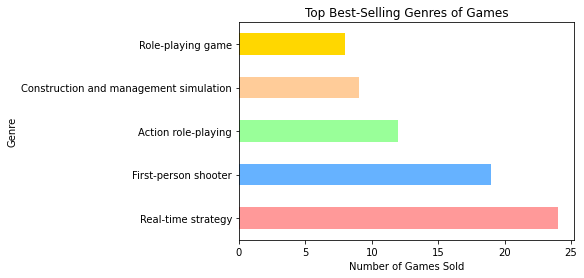

In [18]:
data['Genre'].value_counts().head().plot.barh(stacked = True,color = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700']
)
plt.xlabel('Number of Games Sold')
plt.ylabel('Genre')
plt.title('Top Best-Selling Genres of Games')

## Sales of Games by year

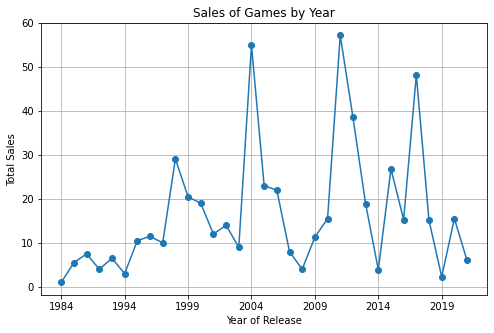

In [18]:
data['Year'] = data['Year'].astype(str)  
Yearly_Sales = data.groupby('Year')['Sales'].sum()
Yearly_Sales.plot(kind='line', marker='o', figsize=(8, 5))
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.title('Sales of Games by Year')
plt.grid(True)
plt.show()

In [19]:
Yearly_Sales = data.groupby('Year')['Sales'].sum()

top_years = Yearly_Sales.nlargest(5)

print(top_years)

Year
2011    57.2
2004    55.0
2017    48.2
2012    38.6
1998    29.1
Name: Sales, dtype: float64


In [20]:
data['Year'].value_counts().head()

Year
2004    11
2001    10
1999     9
2005     9
2016     9
Name: count, dtype: int64

In [21]:
data_2004 = data[data['Year'] == '2004']
data_2004

,Name,Sales,Series,Release,Genre,Developer,Publisher,Month,Year
5,World of Warcraft,14.0,Warcraft,Nov-04,MMORPG,Blizzard Entertainment,Blizzard Entertainment,Nov,2004
6,Half-Life 2,12.0,Half-Life,Nov-04,First-person shooter,Valve,Valve (digital),Nov,2004
11,RollerCoaster Tycoon 3,10.0,RollerCoaster Tycoon,Oct-04,Construction and management simulation,Frontier Developments,"Atari, Inc. (Windows)",Oct,2004
19,The Sims 2,6.0,The Sims,Sep-04,Life simulation,Maxis,Electronic Arts,Sep,2004
33,"Warhammer 40,000: Dawn of War (including expan...",4.0,Warhammer,Sep-04,Real-time strategy,Relic Entertainment,THQ,Sep,2004
64,Counter-Strike: Condition Zero,2.0,Counter-Strike,Mar-04,First-person shooter,Valve,Valve (digital),Mar,2004
65,Counter-Strike: Source,2.0,Counter-Strike,Nov-04,First-person shooter,Valve,Electronic Arts (retail),Nov,2004
69,Far Cry,2.0,Far Cry,Mar-04,First-person shooter,Crytek,Ubisoft,Mar,2004
101,Battlefield Vietnam,1.0,Battlefield,Mar-04,First-person shooter,EA DICE,Electronic Arts,Mar,2004
152,Rome: Total War,1.0,Total War,Sep-04,Real-time strategy,The Creative Assembly,Activision,Sep,2004


In [22]:
data_2004 = data[data['Year'] == '2011']
data_2004

,Name,Sales,Series,Release,Genre,Developer,Publisher,Month,Year
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios,Nov,2011
4,Terraria,17.2,NaN,May-11,Action-adventure,Re-Logic,Re-Logic,May,2011
72,Magicka,2.0,NaN,Jan-11,Action-adventure,Arrowhead Game Studios,Paradox Interactive,Jan,2011
82,The Binding of Isaac,2.0,NaN,Sep-11,"Action-adventure, roguelike",Edmund McMillen & Florian Himsl,Headup Games,Sep,2011
84,The Witcher 2: Assassins of Kings,2.0,The Witcher,May-11,Action role-playing,CD Projekt Red,CD Projekt,May,2011
164,The Legend of Sword and Fairy 5,1.0,The Legend of Sword and Fairy,Jul-11,Role-playing game,Softstar,Softstar,Jul,2011


## Visualizing Of Data


In [23]:
## We can exclude Minecraft Here because we are talking About Best Selling Series of the Year Beacuse MINECRAFT only have one 
## Game Not whole series in the Data
minecraft_data = data[data['Series'] == 'Minecraft']
minecraft_data

,Name,Sales,Series,Release,Genre,Developer,Publisher,Month,Year
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios,Nov,2011


In [27]:
filtered_data = data[data['Series'] != 'Minecraft']

sales_per_series = filtered_df.groupby('Series')['Sales'].sum(numeric_only=True)

top_series = sales_per_series.sort_values(ascending=False).head(10)

print(top_series)

Series
Diablo                  26.0
The Sims                24.0
Half-Life               21.0
Warcraft                19.0
StarCraft               19.0
The Witcher             16.0
Civilization            14.0
RollerCoaster Tycoon    14.0
Guild Wars              11.0
Dark Souls               9.6
Name: Sales, dtype: float64


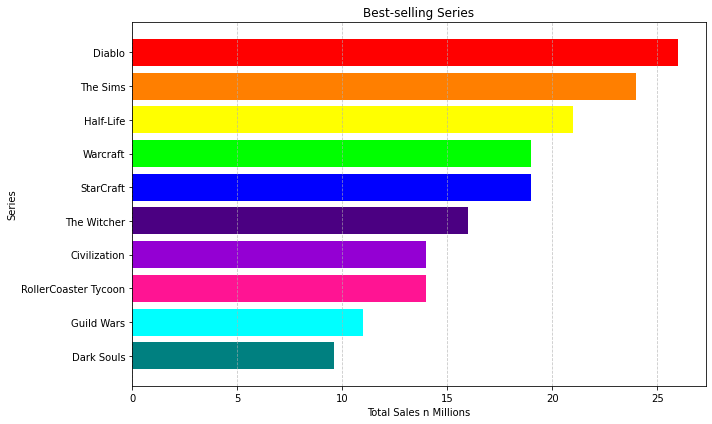

In [28]:
##Best selling SERIES of the year 
plt.figure(figsize=(10, 6))
plt.barh(top_series.index, top_series.values, color = ['#FF0000', '#FF7F00', '#FFFF00', '#00FF00', '#0000FF', '#4B0082', '#9400D3', '#FF1493', '#00FFFF', '#008080']
)
plt.xlabel('Total Sales n Millions')
plt.ylabel('Series')
plt.title('Best-selling Series')
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()

# Which Game from each Series Made the Most Sales?


In [29]:
sales_per_series_name = filtered_data.groupby(['Series', 'Name'])['Sales'].sum(numeric_only=True)

top_series = filtered_data.groupby('Series')['Sales'].sum().nlargest(10).index

filtered_dataa = filtered_data[filtered_data['Series'].isin(top_series)]
pivot_data = filtered_dataa.pivot(index='Name', columns='Series', values='Sales')

<Figure size 1080x1080 with 0 Axes>

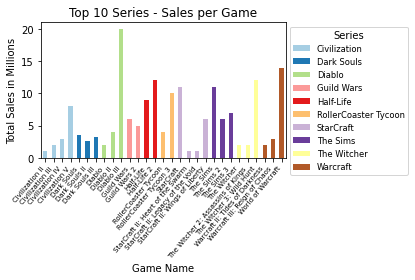

In [30]:
plt.figure(figsize=(15,15))
pivot_data.plot(kind='bar', stacked=True, colormap='Paired')
plt.xlabel('Game Name')
plt.ylabel('Total Sales in Millions')
plt.title('Top 10 Series - Sales per Game')
plt.legend(title='Series', bbox_to_anchor=(1,1), loc='upper left', fontsize='small', ncol=1)
plt.xticks(rotation = 50, ha='right',fontsize=7)
plt.tight_layout()
plt.show()

## Which Developer have Developed Most Games

In [31]:
data['Developer'].value_counts().head()

Developer
Blizzard Entertainment        8
Maxis                         6
Paradox Development Studio    5
id Software                   4
Westwood Studios              4
Name: count, dtype: int64

Text(0.5, 1.0, 'Top Developers')

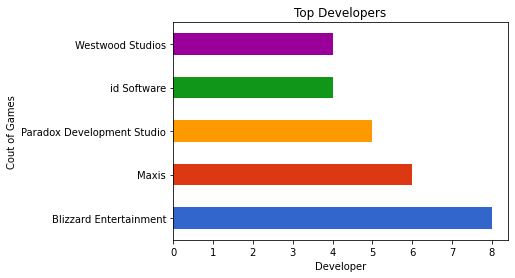

In [32]:
data['Developer'].value_counts().head().plot.barh(color = ['#3366CC', '#DC3912', '#FF9900', '#109618', '#990099']
)
plt.xlabel('Developer')
plt.ylabel('Cout of Games')
plt.title('Top Developers')

## Publisher With Most Released Game

In [33]:
data['Publisher'].value_counts().head()

Publisher
Electronic Arts           19
Blizzard Entertainment     8
Paradox Interactive        7
Activision                 6
GT Interactive             5
Name: count, dtype: int64

Text(0.5, 1.0, 'Top Publishers')

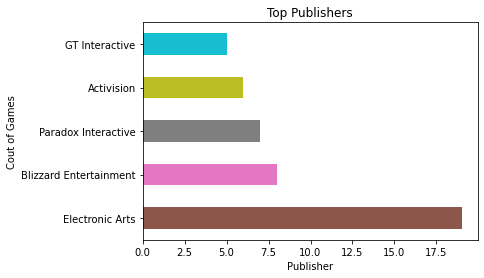

In [35]:
data['Publisher'].value_counts().head().plot.barh(color = ['#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
plt.xlabel('Publisher')
plt.ylabel('Cout of Games')
plt.title('Top Publishers')

In [36]:
data

,Name,Sales,Series,Release,Genre,Developer,Publisher,Month,Year
0,PlayerUnknown's Battlegrounds,42.0,NaN,Dec-17,Battle royale,PUBG Studios,Krafton,Dec,2017
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios,Nov,2011
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment,May,2012
3,Garry's Mod,20.0,NaN,Nov-06,Sandbox,Facepunch Studios,Valve,Nov,2006
4,Terraria,17.2,NaN,May-11,Action-adventure,Re-Logic,Re-Logic,May,2011
...,...,...,...,...,...,...,...,...,...
170,Vietcong,1.0,Vietcong,Mar-03,Tactical shooter,Pterodon,Gathering of Developers,Mar,2003
171,Warhammer Online: Age of Reckoning,1.0,Warhammer,Sep-08,MMORPG,Mythic Entertainment,Electronic Arts,Sep,2008
172,Who Wants to Be a Millionaire?,1.0,NaN,Nov-99,Trivia game,Jellyvision,Disney Interactive Studios,Nov,1999
173,Wing Commander 3: Heart of the Tiger,1.0,Wing Commander,Dec-94,Space combat simulation,Origin Systems,Electronic Arts,Dec,1994
